In [3]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal

In [6]:
dataset=mnist.load_data()

In [37]:
(X_train,y_train),(X_test,y_test)=dataset

In [38]:
X_train.shape

(60000, 28, 28)

In [39]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [62]:
X_train=X_train/255
X_test=X_test/255

In [64]:
X_train[0].shape

(784,)

In [65]:
Y_train=np_utils.to_categorical(y_train,10)
Y_test=np_utils.to_categorical(y_test,10)

In [66]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [67]:
from keras.models import Sequential
from keras.layers import Dense,Activation

In [68]:
output_dim=10
input_dim=784
batch_size=128
epochs=20

In [69]:
model=Sequential()
model.add(Dense(output_dim,input_dim=input_dim,activation='softmax'))

In [70]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [71]:
history=model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 18us/step - loss: 1.2990 - accuracy: 0.6913 - val_loss: 0.8155 - val_accuracy: 0.8369
Epoch 2/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.7184 - accuracy: 0.8418 - val_loss: 0.6073 - val_accuracy: 0.8641
Epoch 3/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.5876 - accuracy: 0.8601 - val_loss: 0.5250 - val_accuracy: 0.8760
Epoch 4/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.5255 - accuracy: 0.8690 - val_loss: 0.4795 - val_accuracy: 0.8808
Epoch 5/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.4878 - accuracy: 0.8757 - val_loss: 0.4498 - val_accuracy: 0.8864
Epoch 6/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.4620 - accuracy: 0.8802 - val_loss: 0.4285 - val_accuracy: 0.8911
Epoch 7/20
60000/60000 [==============================] - 1s 21us/st

In [72]:
pred=model.evaluate(X_test,Y_test)
print("Score",pred[0])
print("Accuracy",pred[1])

10000/10000 [==============================] - 0s 27us/step
Score 0.3358439813256264
Accuracy 0.910099983215332


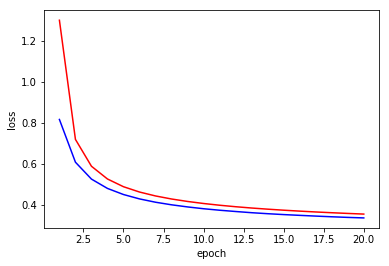

In [75]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

x=list(range(1,epochs+1))

vy=history.history['val_loss']
ty=history.history['loss']

def plt_dynamic(x,y,y_1,ax,colors=['b']):
    ax.plot(x,y,'b',label='Train loss')
    ax.plot(x,y_1,'r',label='Test loss')
    if len(x)==1:
        plt.legend()
    fig.canvas.draw()
plt_dynamic(x,vy,ty,ax)

In [97]:
#Multilayer Perceptron
from keras.layers import BatchNormalization , Dropout 
model2=Sequential()
model2.add(Dense(512,activation='sigmoid',input_shape=(input_dim,)))#we can initialize weights as well using kernel_initialization
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(128,activation='sigmoid'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(output_dim,activation='softmax'))

model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)              

In [98]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [99]:
history2=model2.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.4852 - accuracy: 0.8548 - val_loss: 0.2551 - val_accuracy: 0.9257
Epoch 2/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.3261 - accuracy: 0.9028 - val_loss: 0.2217 - val_accuracy: 0.9338
Epoch 3/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.2887 - accuracy: 0.9133 - val_loss: 0.1993 - val_accuracy: 0.9409
Epoch 4/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.2627 - accuracy: 0.9204 - val_loss: 0.1739 - val_accuracy: 0.9489
Epoch 5/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.2391 - accuracy: 0.9281 - val_loss: 0.1581 - val_accuracy: 0.9512
Epoch 6/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.2180 - accuracy: 0.9337 - val_loss: 0.1391 - val_accuracy: 0.9569
Epoch 7/20
60000/60000 [==============================] - 8s 1

In [100]:
pred2=model2.evaluate(X_test,Y_test)
print("Score",pred2[0])
print("Accuracy",pred2[1])

10000/10000 [==============================] - 1s 53us/step
Score 0.06168250770899467
Accuracy 0.9815999865531921


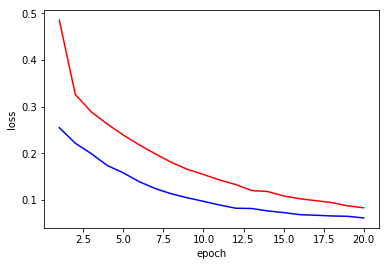

In [101]:
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

x=list(range(1,epochs+1))

vy=history2.history['val_loss']
ty=history2.history['loss']

plt_dynamic(x,vy,ty,ax)

In [102]:
weights=model2.get_weights()

In [103]:
print(weights[0].shape)
print(weights[2].shape)
print(weights[4].shape)

(784, 512)
(512,)
(512,)
